In [25]:
import pandas as pd # Manupalación de datos
import numpy as np # Calcula matemáticos
import matplotlib.pyplot as plt # Gráficos
import seaborn as sns # Gráficos más  bonitos
import warnings # Omitir los mensajes de advertencia, solo me monstrara los mensajes de error

In [26]:
warnings.filterwarnings('ignore') # Omitimos los mensajes de advertencia

#### Importación de la base de datos.

In [27]:
df=pd.read_csv("C:\\Users\\amado\\Desktop\\Ciencias de datos\\Bases de datos\\houses_to_rent.csv")
# Usamos de la función read_csv para poder importar nuestro archivo csv.

#### Visualizamos las primeras 5 observaciones.

In [4]:
df.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [28]:
df=df.drop(['Unnamed: 0','hoa',
            'property tax','total'],axis='columns')
# Borramos las variables que no aportan valor.


<h1 style="text-align: center">¿Cuánto costará el precio de renta?</h1>

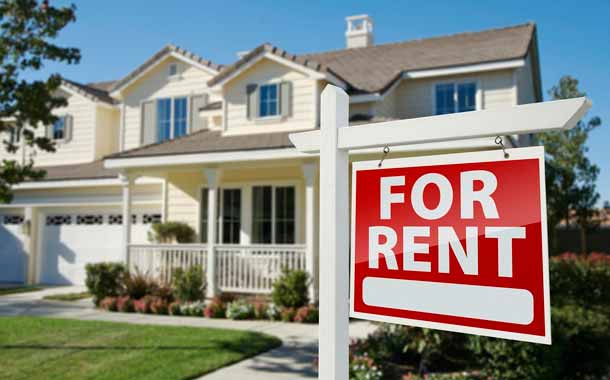

# Definición del problema



Crear un algorimo de regresión con el objetivo de predecir el costo de alquilier.



- **Area**:Tamaño de la casa de alquiler

- **Rooms**: Número de habitaciones

- **Bathroom**: Número de baños

- **Parkin Spaces**: Cantidad de estacionamientos para vehiculos.

- **Floor**: Número de pisos.

- **Animal**: Sí acepta animales o no.

- **Furniture**: Sí la casa está amueblada o no

- **Fire insurence**: Precio por el seguro contra incendios.

- **Rent amount**: Precio de renta.

#### Monstramos información del dataframe.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            6080 non-null   int64 
 1   area            6080 non-null   int64 
 2   rooms           6080 non-null   int64 
 3   bathroom        6080 non-null   int64 
 4   parking spaces  6080 non-null   int64 
 5   floor           6080 non-null   object
 6   animal          6080 non-null   object
 7   furniture       6080 non-null   object
 8   rent amount     6080 non-null   object
 9   fire insurance  6080 non-null   object
dtypes: int64(5), object(5)
memory usage: 475.1+ KB


Observamos que las variables del precio del seguro contra incendio y el precio de renta son tipo objeto es decir texto, lo cual tendremos que preprocesarla eliminar los carácteres tipo texto para convertirlo a variable numérica.

In [29]:
def remove_strings(col):
    
    df[col]=df[col].str.replace('R','') 
    df[col]=df[col].str.replace('$','')
    df[col]=df[col].str.replace(',','')
    
    # Creamos una función para remover los carácteres tipo cadena.

In [30]:
for col in ['rent amount','fire insurance']:
    
    remove_strings(col)
    
# Invocamos la función remove_strings y la pasamos como parámetro las variables de interés.

In [31]:
df['fire insurance']=df['fire insurance'].astype(int)
df['rent amount']=df['rent amount'].astype(float)

# Tranformalos las variables a tipo numérico.

In [32]:
df[['fire insurance','rent amount']].head()

,fire insurance,rent amount
0,121,8000.0
1,11,820.0
2,89,7000.0
3,16,1250.0
4,16,1200.0


Efectivamente hemos transformado las variables de interés.

#### Cantidad de pisos según la casa.

In [11]:
df['floor'].value_counts()[:5]

-    1555
1     573
3     401
2     379
4     319
Name: floor, dtype: int64

Observamos un carácter tipo string donde se encuentra en mayor abundancia por lo cual tendremos que reemplazarlos,en este caso dicho carácter lo vamos a cambiar por 1, ya que hay más apartamentos con un sólo piso.

In [33]:
df['floor']=np.where(df['floor']=='-','1',df['floor']).astype(int)
# Tranformamos la variable floor por tipo entero.

In [34]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount,fire insurance
0,1,240,3,3,4,1,acept,furnished,8000.0,121
1,0,64,2,1,1,10,acept,not furnished,820.0,11
2,1,443,5,5,4,3,acept,furnished,7000.0,89
3,1,73,2,2,1,12,acept,not furnished,1250.0,16
4,1,19,1,1,0,1,not acept,not furnished,1200.0,16


Ya se aprecian que hemos transformados los datos.

#### Visualizamos la categoria de las variables categóricas.

In [19]:
{col:list(df[col].unique()) for col in df.select_dtypes('object')}

{'animal': ['acept', 'not acept'], 'furniture': ['furnished', 'not furnished']}

In [20]:
serie_animal=df['animal'].value_counts()
serie_furniture=df['furniture'].value_counts()

# Nos va hacer un conteo de la variable categórica de interés.

In [21]:
def pie_plot(serie,title):
    
    
    serie.plot(kind='pie',title=title, figsize=[20,8],colors=['#84b6f4','#fdcae1'],explode=[0.01,0.1],
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*serie.sum()))

    plt.ylabel(None)
# Creamos una función que nos perimite crear una gráfica dde pastel donde nos monstrara el porcentaje y el conteo de las categorias.

### Porcentaje de departamentos que aceptan mascotas.

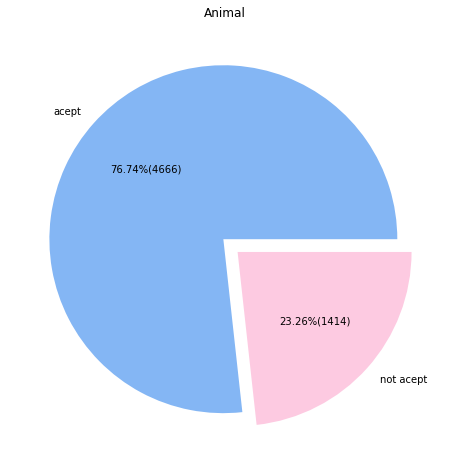

In [22]:
pie_plot(serie_animal,'Animal')

Hay mas departamentos donde si aceptan mascotas.

### Porcentaje de departamentos amueblados.

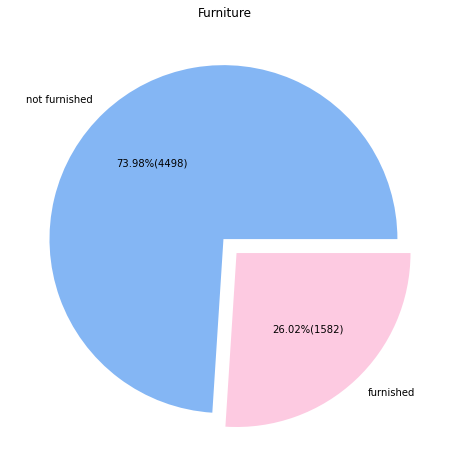

In [23]:
pie_plot(serie_furniture,'Furniture')

Hay más casas de renta que las casas si están amuebladas.

In [35]:
sns.set_style(style='whitegrid')

### Histogramas 

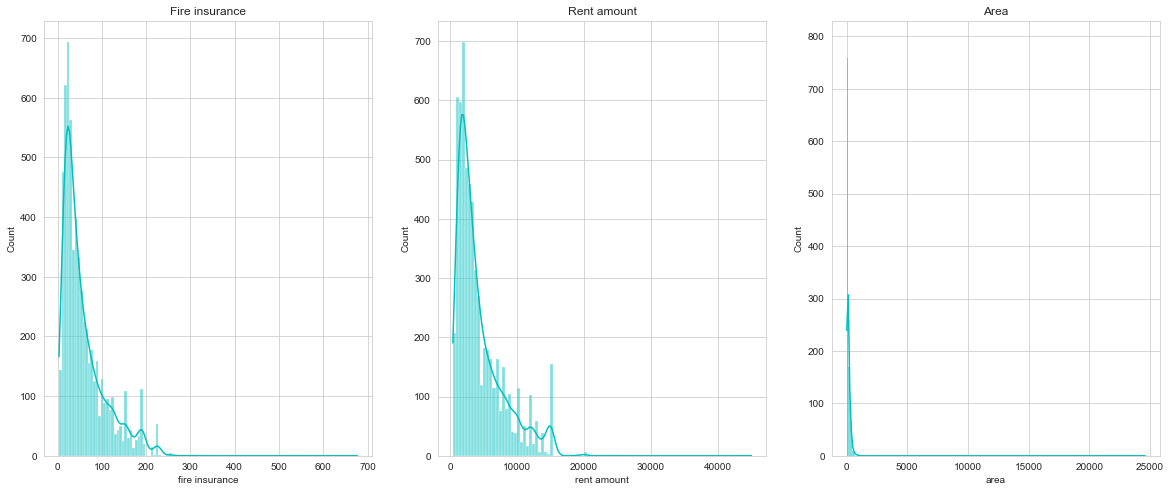

In [25]:
fig,(ax_1,ax_2,ax_3)=plt.subplots(1,3,figsize=(20,8))


ax_1.set_title('Fire insurance')
sns.histplot(x=df['fire insurance'],ax=ax_1,kde=True,color='c')



ax_2.set_title('Rent amount')
sns.histplot(x=df['rent amount'],ax=ax_2,kde=True,color='c')

ax_3.set_title('Area')
sns.histplot(x=df['area'],ax=ax_3,kde=True,color='c')

plt.show()

Se aprecia mucho sesgo en los histogramas,especialmente para la variable area ya que hay muy pocas casas de rentas  con 25,000 metros cuadrados.

In [26]:
df[['rent amount','area','fire insurance']].describe()

,rent amount,area,fire insurance
count,6080.000000,6080.000000,6080.000000
mean,4395.844408,151.143914,58.204276
std,3576.668946,375.559485,49.313441
min,420.000000,10.000000,3.000000
25%,1800.000000,58.000000,23.000000
50%,3111.000000,100.000000,41.000000
75%,5952.500000,200.000000,77.000000
max,45000.000000,24606.000000,677.000000


## Eliminación de valores atípicos

Con el objetivo de minimizar el sesgo de nuestros datos y tener un mejor randimiento para nuestro modelo.

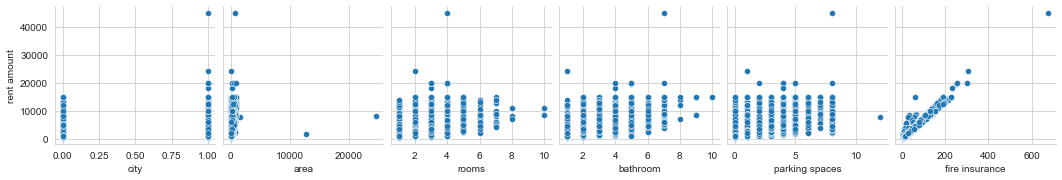

In [27]:
sns.pairplot(data=df,
             x_vars=['city','area','rooms','bathroom','parking spaces','fire insurance'],
             y_vars=['rent amount']
            )

plt.show()

Observamos que hay muy pocos departamentos que tienen más de 8 baños.

Hay muy pocos espacios de estacionamiento menores a 7.

Hay muy pocos casos donde haya más de 7 habitaciones.

Hay muy pocas casas de renta con un precio cercano a $60,000 dólares.

Hay muy pocas casas con un área superior a 10,000 métros cuadrados.

In [36]:
df=df[df['rent amount']<=12500]  # Seleccionamos los valores con un nivel menor o igual a $12,500 dólares.
df=df[df['area']>10]    # Seleccionamos donde el área de la casa sea mayor a 10 metros cuadrados.                                        
df=df[df['area']<=650] # Seleccionamos donde el área de la casa sea menor o igual a 650 metros cuadrados.
df=df[df['bathroom']<8] # Seleccionamos donde el número de baños sea menor a 8.
df=df[df['parking spaces']<7] # Seleccionamos donde el número de espacios de estacionamiento sea inferior a 7.

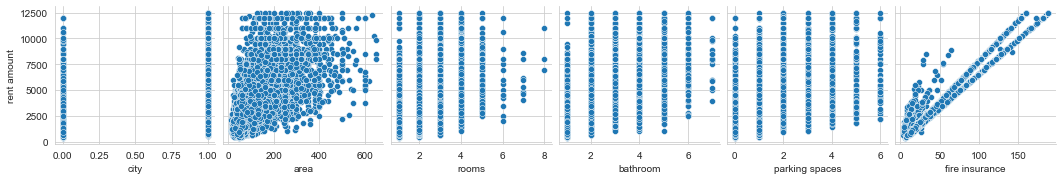

In [37]:
sns.pairplot(data=df,
             x_vars=['city','area','rooms','bathroom','parking spaces','fire insurance'],
             y_vars=['rent amount']
            )

plt.show()

In [38]:
df=df[df['rooms']<7] # Dejamos aquellos departamentos que sean menores a 7 habitaciones.
df=df[df['fire insurance']>=10] # Dejamos aquellos seguros de fuego que sean mayor o igual a $10 dólares.

#### Tranformación logartimica

Para las variables del precio del seguro contra fuego,el área de la casa y el precio de renta mensual aplicaremos una transformación logaritmica con el objetivo de suavizar los valores atípicos y darles un mejor tratamiento para que no haya tanta diferencia entre ellos.

In [39]:
df['fire insurance']=np.log(df['fire insurance'])
df['area']=np.log(df['area'])
df['rent amount']=np.log(df['rent amount'])

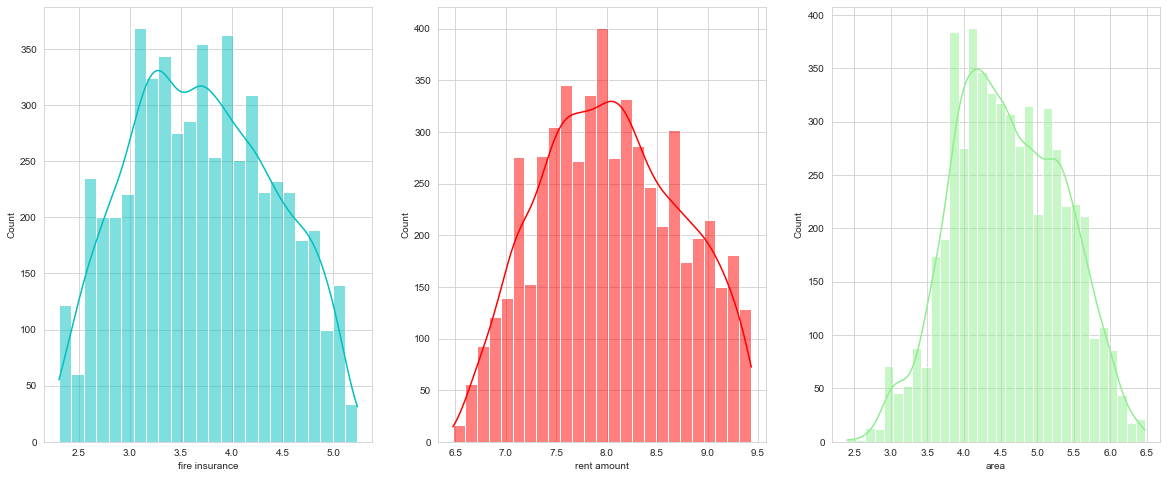

In [43]:
fig,(ax_1,ax_2,ax_3)=plt.subplots(1,3,figsize=(20,8))

sns.histplot(x='fire insurance',data=df,ax=ax_1,color='c',kde=True)

sns.histplot(x='rent amount',data=df,ax=ax_2,color='r',kde=True)

sns.histplot(x='area',data=df,ax=ax_3,color='lightgreen',kde=True)

plt.show()

Para las 3 variables se observa una mejor distribución de los datos comparandolos con los anteriores histogramas.

### ¿El precio de alquiler aumenta si está amueblada?

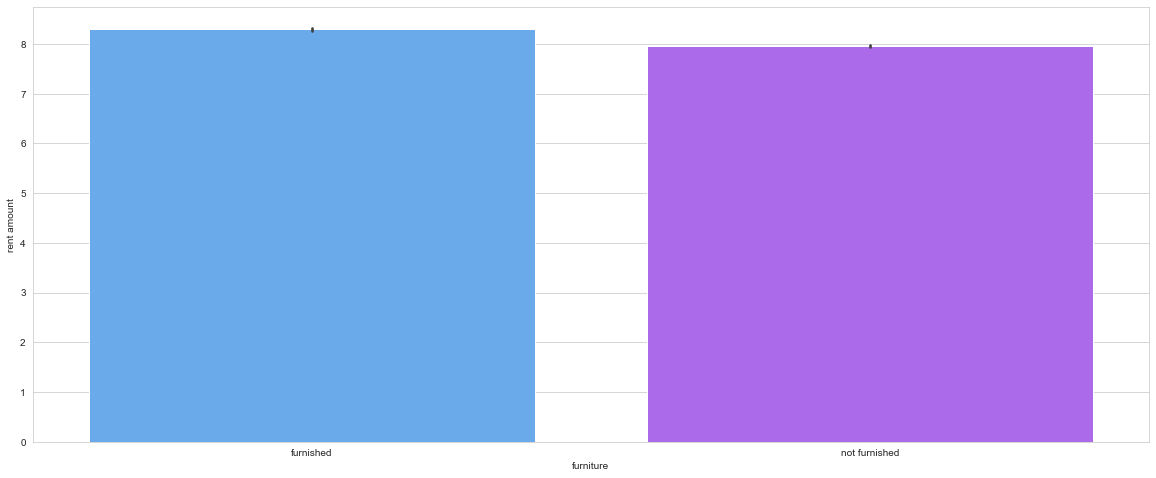

In [44]:
plt.subplots(1,1,figsize=(20,8))
sns.barplot(x='furniture',y='rent amount',data=df,palette='cool')
plt.show()

En efecto observamos que el precio es ligerarmente superior a las que no están amueblados,puesto que no habrá la necesidad de volver a traer nuevos muebles.

### ¿ Aceptar animales en el departamento aumenta el precio del alquiler?

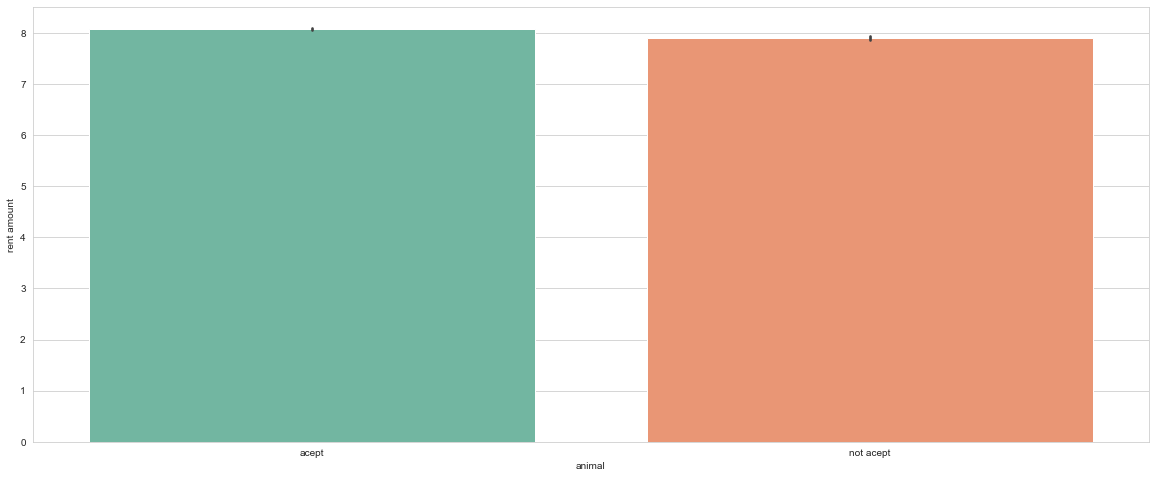

In [45]:
plt.subplots(1,1,figsize=(20,8))
sns.barplot(x='animal',y='rent amount',data=df,palette='Set2')
plt.show()

Aumenta el precio ligeramente ya que las mascotas pueden hacer daños exteriores en los departamentos.

### ¿Qué tipo de cuidad tiene un precio más alto?

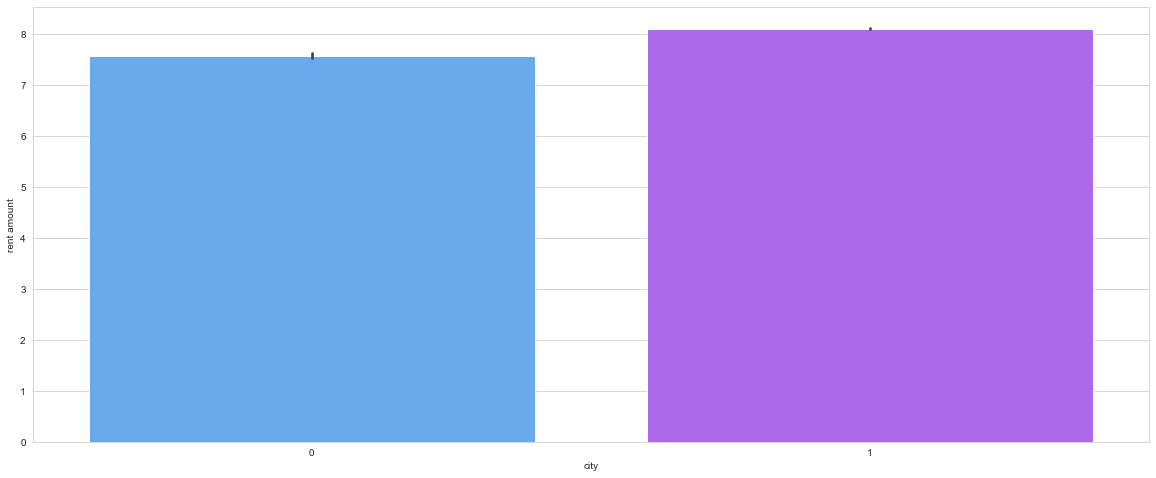

In [53]:
plt.subplots(1,1,figsize=(20,8))
sns.barplot(x='city',y='rent amount',data=df,palette='cool')
plt.show()

La cuidad de 1 tiene precios ligeramente más caro que la cuidad 0.

### Matriz de correlación.

La correlación se mide de 0 a 1 si la relación es positiva y si es negativa se medira de 0 a -1.

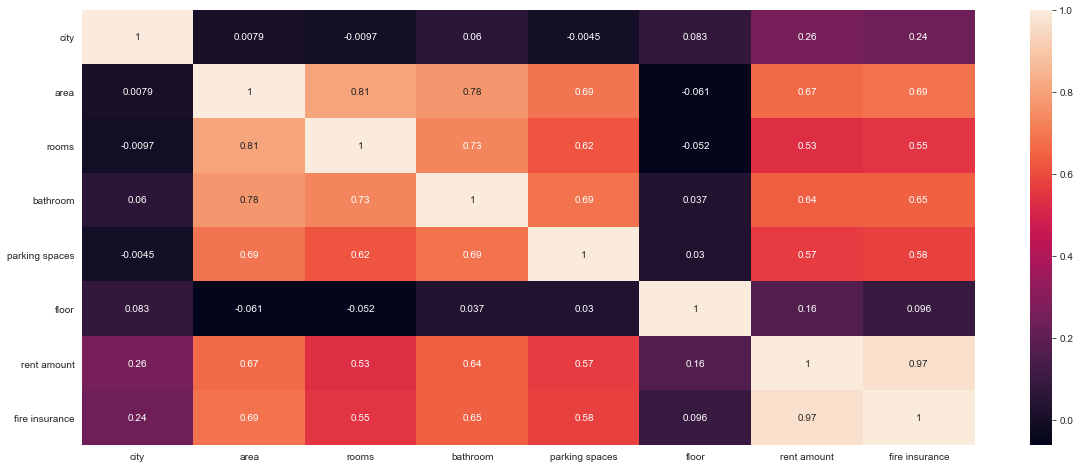

In [35]:
plt.subplots(1,1,figsize=(20,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

Las variables como el precio del seguro contra fuego,el área,la cantidad de habitaciones y de baños están altamente relacionadas con el precio de la renta.

In [55]:
df=df.drop(['floor','city'],axis='columns')
# Borramos las variables que no son significantes.

### Tranfromamos las variables categoricas en numéricas

In [56]:
df['furniture']=np.where(df['furniture']=='furnished',1,0)
# Si la casa está amueblada le asiganrá un 1 de lo contrario pondrá un 0.
df['animal']=np.where(df['animal']=='acept',1,0)
# Si acepta mascotas le asignara un 1 de lo contrario un 0.

# Creación del modelo.

Daremos uso a un método de penalizacíon Ridge que es una variante de una regresión lineal,de hecho es una variante de está con la diferencia que dicho método de penalización minimiza el peso de los coeficientes de las variables que no son tan significativas.

In [73]:
df.head()

,area,rooms,bathroom,parking spaces,animal,furniture,rent amount,fire insurance
0,5.480639,3,3,4,1,1,8.987197,4.795791
1,4.158883,2,1,1,1,0,6.709304,2.397895
2,6.093570,5,5,4,1,1,8.853665,4.488636
3,4.290459,2,2,1,1,0,7.130899,2.772589
4,2.944439,1,1,0,0,0,7.090077,2.772589


In [74]:
df.describe()

,area,rooms,bathroom,parking spaces,animal,furniture,rent amount,fire insurance
count,5487.000000,5487.000000,5487.000000,5487.000000,5487.000000,5487.000000,5487.000000,5487.000000
mean,4.599603,2.428467,2.238746,1.589758,0.763988,0.259705,8.041521,3.703847
std,0.747230,1.048728,1.326230,1.336519,0.424669,0.438513,0.690109,0.705015
min,2.397895,1.000000,1.000000,0.000000,0.000000,0.000000,6.476972,2.302585
25%,4.043051,2.000000,1.000000,1.000000,1.000000,0.000000,7.495542,3.135494
50%,4.564348,2.000000,2.000000,1.000000,1.000000,0.000000,8.006368,3.663562
75%,5.192957,3.000000,3.000000,2.000000,1.000000,1.000000,8.575462,4.248495
max,6.476972,6.000000,7.000000,6.000000,1.000000,1.000000,9.433484,5.236442


In [57]:
X=df.drop(['rent amount'],axis='columns').values
y=df['rent amount'].values

# Asiganamos nuestras variables predictoras y nuestra variable a predecir.

### División de datos de entrenamiento y validación.

In [58]:
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

X_train.shape,X_test.shape

((4389, 7), (1098, 7))

Tenemos 4390 variables para entrenar nuestro modelo y el resto es para hacerle el test.

In [59]:
from sklearn.linear_model import RidgeCV
# Importamos el modelo lineal de Ridge.

lm=RidgeCV()

In [60]:
lm.fit(X_train,Y_train) # Le pasamos los datos de entrenamiento a nuestro modelo.

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

### Métricas de desempeño

Usamos el **R ajustado** que nos ayuda a evaluar el grado de explicación del modelo entre más alto tendrá más capacidad explicativa.

El ***error cuadrático medio*** es la diferencia de error entre el valor original y el valor predicho.

In [61]:
lm.score(X_train,Y_train),lm.score(X_test,Y_test)

(0.9438328056021924, 0.9388107137470051)

Tanto para el dato de entrenamiento y validación tienen muy buen poder explicativo con valores bastantes similares.

In [62]:
from sklearn.metrics import mean_squared_error


mean_squared_error(Y_test,lm.predict(X_test)) # Calculamos el error cuadrático medio.

0.02962858512130453

### Validación cruzada

Es una técnica que consta en hacer submuestros aleatorios del dataframe con el objetivo de ver el porcentaje de generalización del modelo.

In [65]:
cross_val_score(lm,X_test,Y_test,cv=10).mean()

0.9379280414439913

Observamos que tiene un alto grado de confianza, lo cual indica que tiene un promedio de generalización de un 93%.

In [66]:
test=pd.DataFrame({'True values':np.exp(Y_test),
                   'Predicted values':np.exp(lm.predict(X_test))})

In [67]:
test.sample(n=50,random_state=0)
# Con la función sanple sacamos una muestra aleatoria de 50 observaciones del nuevo dataframe que creeamos.

,True values,Predicted values
944,1200.0,1478.720016
27,5900.0,5733.951918
425,6300.0,5762.649837
494,1800.0,1779.430968
196,780.0,976.149715
501,2430.0,2342.348429
752,8500.0,8304.587522
792,4325.0,4057.814195
403,3000.0,2920.802787
946,2250.0,2237.961706


Observamos que tiene valores predichos muy cercanos a los originales.

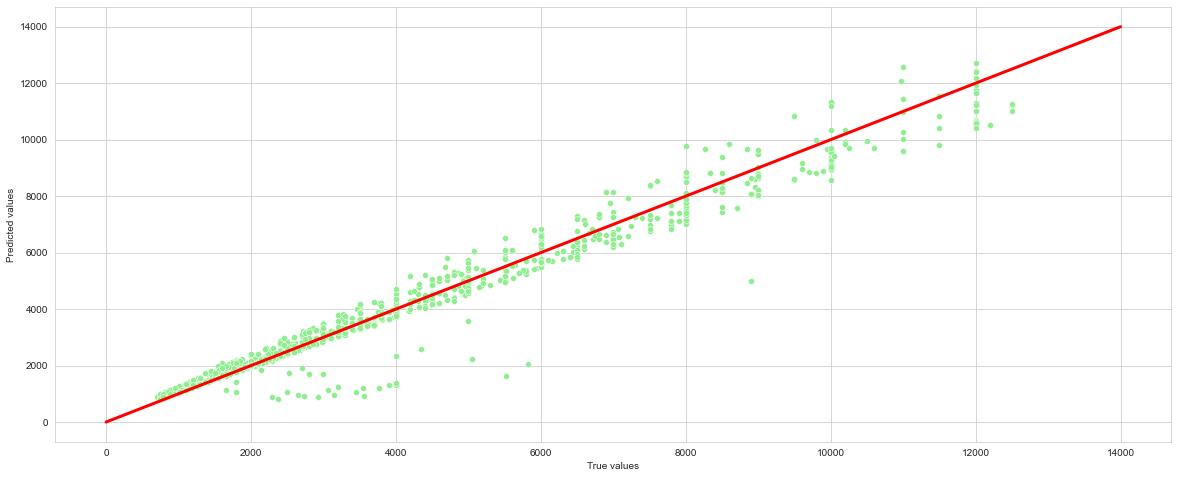

In [68]:
plt.subplots(1,1,figsize=(20,8))
sns.scatterplot(x='True values',y='Predicted values',data=test,color='lightgreen')
sns.lineplot([0,14000],[0,14000],lw=3,color='red')
plt.show()

Los puntos donde están un poco más dispersos que la linea, se le llama error cuadrático medio.

### Guardamos el modelo

In [69]:
import joblib

joblib.dump(lm,'lm_rent_amount.pkl')

['lm_rent_amount.pkl']